<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Handling_Missing_Values_In_Time_Series_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the time series analysis most of the while capturing data from the source may time funtioning some sensors will not for the ceratin period of time due to its malfuntionality or may due to damages.

In the typical machine problem statement we can easily subtitude the null values with some mean or median depends upon distribution or some time  we have drop them also.

But here in time-series analysis we directly drop the null values or replace by some values without any stastical analysis because we always have to care about order of events.

Time-Series data is nothing but ordered events.

We can the inpute with global mean or global median the reason is Time series data might have some seasonality or trends.if we impute the those values in time series at the time we are mess up with current information.

Due to imputation of gloabal mean and median the distribution will get disturbed.



!pip install download

In [5]:
from __future__ import absolute_import, division, print_function,unicode_literals
# __future__ is a real module, and serves three purposes: To avoid confusing existing tools that analyze import statements and expect to find the modules they're importing.
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from download import download
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid']=False

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
path='C:/Users/Microsoft/Downloads'

In [7]:
data = download(url,path,kind='zip',replace=True)

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 5.83MB/s]
Extracting zip file...
Successfully downloaded / unzipped to C:/Users/Microsoft/Downloads


In [8]:
data = pd.read_csv('/content/C:/Users/Microsoft/Downloads/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',encoding='ISO-8859-1')

In [9]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [10]:
def convert_to_date(X):
  from datetime import datetime
  return datetime.strptime(X,'%Y %m %d %H')

In [11]:
data = pd.read_csv('/content/C:/Users/Microsoft/Downloads/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date,keep_date_col=True)

In [12]:
data.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [15]:
data.nunique()

year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10                     554
SO2                      327
NO2                      636
CO                       103
O3                       792
TEMP                     998
PRES                     593
DEWP                     602
RAIN                     116
wd                        16
WSPM                      95
station                    1
dtype: int64

In [17]:
data.shape

(35064, 19)

In [19]:
round(data.describe(),1)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.0,34285.0,34408.0,34334.0,33830.0,33052.0,33850.0,35011.0,35014.0,35011.0,35013.0,35021.0
mean,17532.5,66.0,83.7,11.7,27.6,904.9,68.5,13.7,1007.8,1.5,0.1,1.9
std,10122.2,72.3,79.5,15.5,26.4,903.3,53.8,11.4,10.2,13.8,0.8,1.3
min,1.0,3.0,2.0,0.3,1.0,100.0,0.2,-16.6,982.4,-35.1,0.0,0.0
25%,8766.8,14.0,26.0,2.0,9.0,300.0,31.0,3.4,999.3,-10.2,0.0,1.0
50%,17532.5,41.0,60.0,5.0,19.0,600.0,61.0,14.7,1007.4,1.8,0.0,1.5
75%,26298.2,93.0,117.0,15.0,38.0,1200.0,90.0,23.3,1016.0,14.2,0.0,2.3
max,35064.0,881.0,905.0,156.0,205.0,10000.0,500.0,41.4,1036.5,27.2,52.1,10.0


In [20]:
data.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

In [21]:
data.query('TEMP != TEMP')

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,2015-01-27 20:00:00,16749,2015,1,27,20,39.0,43.0,28.0,34.0,1100.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16813,2015-01-30 13:00:00,16814,2015,1,30,13,15.0,19.0,19.0,5.0,400.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16829,2015-01-31 05:00:00,16830,2015,1,31,5,5.0,11.0,32.0,8.0,400.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16873,2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16883,2015-02-02 11:00:00,16884,2015,2,2,11,138.0,138.0,52.0,73.0,2200.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16930,2015-02-04 10:00:00,16931,2015,2,4,10,8.0,8.0,13.0,5.0,200.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
16933,2015-02-04 13:00:00,16934,2015,2,4,13,13.0,16.0,14.0,3.0,300.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17007,2015-02-07 15:00:00,17008,2015,2,7,15,3.0,24.0,2.0,2.0,200.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17030,2015-02-08 14:00:00,17031,2015,2,8,14,4.0,5.0,7.0,2.0,200.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
17052,2015-02-09 12:00:00,17053,2015,2,9,12,87.0,87.0,82.0,53.0,1600.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling


In [23]:
data.query('TEMP != TEMP').count()

year_month_day_hour    53
No                     53
year                   53
month                  53
day                    53
hour                   53
PM2.5                  53
PM10                   53
SO2                    53
NO2                    53
CO                     53
O3                     53
TEMP                    0
PRES                    3
DEWP                    0
RAIN                    3
wd                     10
WSPM                   10
station                53
dtype: int64

In [24]:
data[data['PM2.5'].isnull()]

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
752,2013-04-01 08:00:00,753,2013,4,1,8,NaN,NaN,NaN,NaN,NaN,NaN,11.0,1005.9,-3.2,0.0,NW,7.2,Dingling
753,2013-04-01 09:00:00,754,2013,4,1,9,NaN,NaN,NaN,NaN,NaN,NaN,10.6,1007.0,-3.5,0.0,NNW,4.5,Dingling
754,2013-04-01 10:00:00,755,2013,4,1,10,NaN,NaN,NaN,NaN,NaN,NaN,13.2,1007.8,-3.6,0.0,NNW,4.5,Dingling
755,2013-04-01 11:00:00,756,2013,4,1,11,NaN,NaN,NaN,NaN,NaN,NaN,13.8,1007.7,-4.9,0.0,NNE,4.0,Dingling
756,2013-04-01 12:00:00,757,2013,4,1,12,NaN,NaN,NaN,NaN,NaN,NaN,15.3,1007.9,-5.7,0.0,NE,5.0,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34863,2017-02-20 15:00:00,34864,2017,2,20,15,NaN,NaN,NaN,NaN,NaN,NaN,4.2,1022.0,-21.0,0.0,WNW,3.1,Dingling
34864,2017-02-20 16:00:00,34865,2017,2,20,16,NaN,NaN,NaN,NaN,NaN,NaN,4.4,1022.1,-21.7,0.0,WNW,3.4,Dingling
34866,2017-02-20 18:00:00,34867,2017,2,20,18,NaN,NaN,NaN,NaN,NaN,NaN,3.3,1022.2,-20.9,0.0,NE,1.1,Dingling
34883,2017-02-21 11:00:00,34884,2017,2,21,11,NaN,NaN,26.0,68.0,NaN,5.0,-0.5,1022.7,-16.0,0.0,ESE,1.9,Dingling


https://plotly.com/python/plotly-express/

https://plotly.com/python/line-charts/

https://plotly.com/python/axes/

https://plotly.com/python/range-slider/

https://plotly.com/python/v3/custom-buttons/

In [31]:
import plotly.express as px
fig = px.line(data,x='year_month_day_hour',y='PM2.5',title='Slider Of 2.5PM')

fig.update_xaxes(rangeslider_visible=True,rangeselector = dict(buttons=list([
                                                                             
                          dict(count=1,label='1y',step='year',stepmode='backward'),
                          dict(count=1,label='2y',step='year',stepmode='backward'), 
                          dict(count=1,label='3y',step='year',stepmode='backward'),
                          dict(step='all') ])))                                                
fig.show()

In [30]:
import plotly.express as px
fig = px.line(data,x='year_month_day_hour',y='TEMP',title='Slider Of Temperature')

fig.update_xaxes(rangeslider_visible=True,rangeselector = dict(buttons=list([
                                                                             
                          dict(count=1,label='1y',step='year',stepmode='backward'),
                          dict(count=1,label='2y',step='year',stepmode='backward'), 
                          dict(count=1,label='3y',step='year',stepmode='backward'),
                          dict(step='all') ])))                                                
fig.show()

We can not directly drop that null values as well as we can impute themself with some values because if we see there is some seasonality and trend is present.


In [32]:
data1 = data.set_index('year_month_day_hour') #It is important to fiter the data on the basis of dates.

In [34]:
data1['2015-02-02':'2015-02-04'].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-02-02 00:00:00,16873,2015,2,2,0,67.0,67.0,32.0,40.0,2600.0,11.0,-4.0,1025.0,-19.5,0.0,NW,1.3,Dingling
2015-02-02 01:00:00,16874,2015,2,2,1,60.0,60.0,30.0,39.0,2600.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-02 02:00:00,16875,2015,2,2,2,65.0,65.0,17.0,46.0,2600.0,3.0,-6.0,1023.0,-19.7,0.0,NNW,0.1,Dingling
2015-02-02 03:00:00,16876,2015,2,2,3,75.0,75.0,18.0,50.0,2900.0,3.0,-6.0,1023.0,-19.4,0.0,NNW,2.3,Dingling
2015-02-02 04:00:00,16877,2015,2,2,4,96.0,96.0,19.0,53.0,3600.0,2.0,-6.0,1023.0,-19.0,0.0,NW,1.5,Dingling


In [35]:
data2 = data1.copy()
data2 = data2.dropna() #Droping the null values in order to visualize the data.

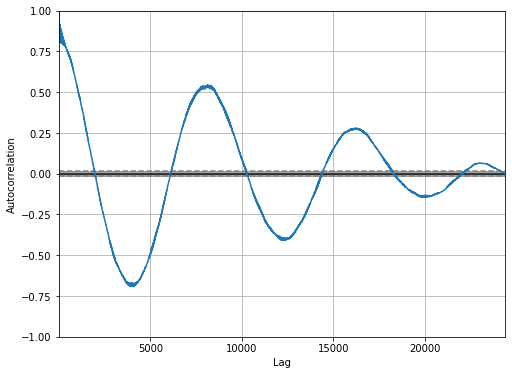

In [39]:
pd.plotting.autocorrelation_plot(data2['2014':'2016']['TEMP'])
#in this we can say that correlation happening on yealy basis.

# `24 hours *365 = 8760`

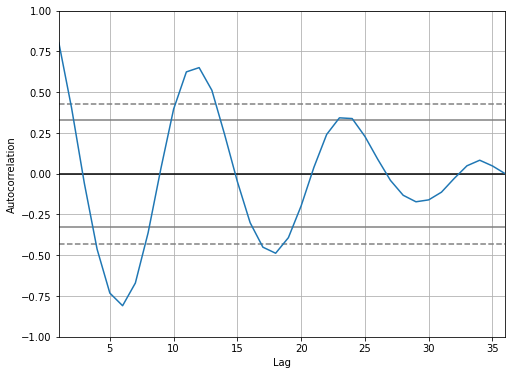

In [41]:
pd.plotting.autocorrelation_plot(data2['2014':'2016'].resample('M')['TEMP'].mean())
#change the frequency from Hours to month with mean of TEMPERATURE.
#So there is also we can say here is also the seasonality is present.
#It is giving us the idea that we can inpute last year as data to present year null values.
#Grey strong line showing that 0.90 % of confidence intervals.
#dotted line shows the 95 of confidence intervals.

We will do the further analysis:-

Trying to find auto-correlation on the basis of different time lags.

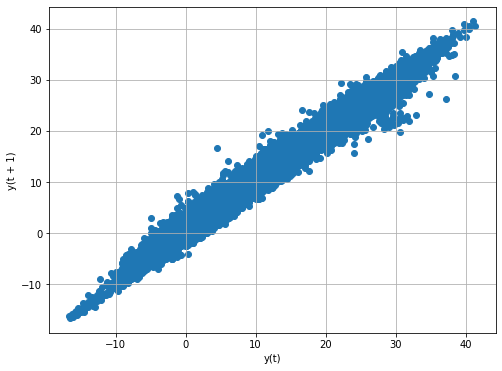

In [45]:
pd.plotting.lag_plot(data['TEMP'],lag=1)
plt.grid()
plt.show()
#In this condition we are able to see that one hour back relationship
# In that we are able to see that atuto-correlation is positive in nature.lots of linerity present with less variance and well centered to zero.

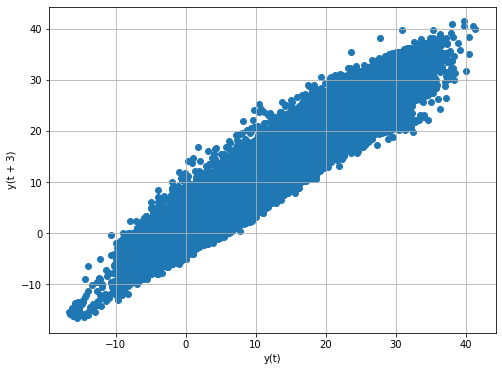

In [47]:
pd.plotting.lag_plot(data['TEMP'],lag=3)
plt.grid()
plt.show()

#Here the some linearity but the some data is moving away that indicates little bit of less autocorrelation.

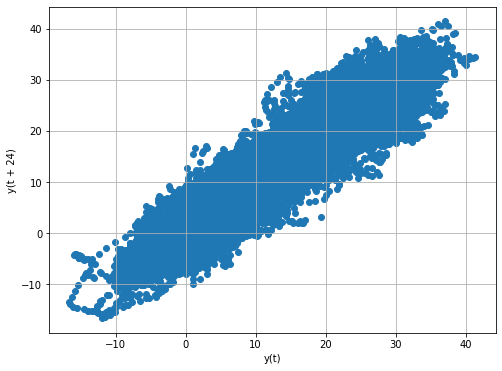

In [48]:
pd.plotting.lag_plot(data['TEMP'],lag=24)
plt.grid()
plt.show()
#Here the data is moving with high variance but linear relation, here is also the postive correlation.

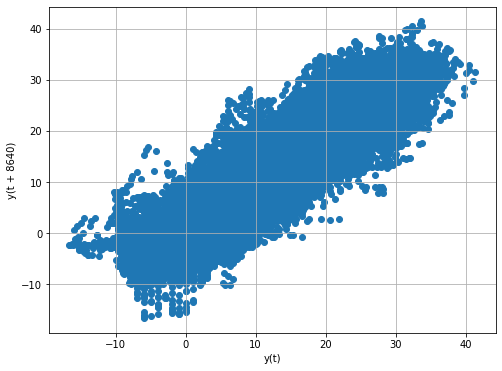

In [49]:
#yearly seasonality 
pd.plotting.lag_plot(data['TEMP'],lag=8640)
plt.grid()
plt.show()
#It is showing that positive auto-correlation
#Which indicating the liner auto-correlation is avalible but the not that much as we have obtain in the 24 hours,3hours,1 hour.

Now I know I can substitue last 3 hours data,last 24 hours due to positive autocorrelation.

In [ ]:
#Take the data for the substitution.

In [51]:
data_sample=data1['2015-02-21 10':'2015-02-21 20']
data_sample
 #Lets foucus on only the TEMP 
#check the null values

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-02-21 10:00:00,17339,2015,2,21,10,171.0,171.0,16.0,48.0,2400.0,6.0,1.0,1005.0,-1.1,0.0,SW,1.1,Dingling
2015-02-21 11:00:00,17340,2015,2,21,11,172.0,172.0,16.0,45.0,2200.0,13.0,1.0,1006.0,-0.9,0.0,SSW,1.2,Dingling
2015-02-21 12:00:00,17341,2015,2,21,12,164.0,164.0,16.0,46.0,2100.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 13:00:00,17342,2015,2,21,13,175.0,175.0,16.0,46.0,2200.0,15.0,2.0,1006.0,-0.3,0.0,SW,1.6,Dingling
2015-02-21 14:00:00,17343,2015,2,21,14,207.0,207.0,16.0,46.0,2300.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 15:00:00,17344,2015,2,21,15,231.0,231.0,18.0,40.0,2200.0,32.0,4.0,1004.0,-8.7,0.0,W,9.6,Dingling
2015-02-21 16:00:00,17345,2015,2,21,16,3.0,114.0,7.0,5.0,1100.0,88.0,4.0,1005.0,-12.5,0.0,NW,9.0,Dingling
2015-02-21 17:00:00,17346,2015,2,21,17,24.0,227.0,2.0,3.0,1800.0,91.0,3.0,1009.0,-16.7,0.0,WNW,6.4,Dingling
2015-02-21 18:00:00,17347,2015,2,21,18,40.0,351.0,2.0,2.0,1800.0,97.0,2.0,1010.0,-21.3,0.0,NW,7.3,Dingling


In [54]:
data_sample['TEMP'] 
#Here the 3 null values are present.

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    NaN
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    NaN
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.0
2015-02-21 18:00:00    2.0
2015-02-21 19:00:00    1.0
2015-02-21 20:00:00    NaN
Name: TEMP, dtype: float64

In [56]:
data_sample['Forefilled_Temp'] = data_sample['TEMP'].fillna(method='ffill')
#Foreward filling method fill the null values with nearer values from top to bottom direction.

In [57]:
data_sample['Forefilled_Temp']

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    1.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    2.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.0
2015-02-21 18:00:00    2.0
2015-02-21 19:00:00    1.0
2015-02-21 20:00:00    1.0
Name: Forefilled_Temp, dtype: float64

Similar way we can do the imputation by using the `Backward filling`.In this we are imputing the data from bottom to top.

This will help use to do impution But practically not preferable in time series data analysis.


We always depends upon the past data in order to predict future.

So in case of `bfill` is taking the values from future to present i.e. bottom to top.

Sometimes problem will happen where the temperature will rapidly change.

SO in this case we don't want to baised our values on the previous hours so in this case we will previous two make mean and subtituted.

It can done we with help of rolling window method.

In [60]:
rolling_filling=data_sample['TEMP'].rolling(window=2,min_periods=1).mean()
rolling_filling

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    1.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    2.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.5
2015-02-21 18:00:00    2.5
2015-02-21 19:00:00    1.5
2015-02-21 20:00:00    1.0
Name: TEMP, dtype: float64

In [61]:
data_sample['Temp_rolling']=rolling_filling

In [65]:
data_inputed=data_sample[['TEMP','Forefilled_Temp',	'Temp_rolling']]

In [ ]:
#Last year data we have got with same dates as the index was in data_sample on year goes down by one.
#Temp valeus avalible according to that period of time.

In [79]:
data2.loc[data_sample.index + pd.offsets.DateOffset(years=-1)]['TEMP']

year_month_day_hour
2014-02-21 10:00:00    1.4
2014-02-21 11:00:00    2.4
2014-02-21 12:00:00    3.0
2014-02-21 13:00:00    3.8
2014-02-21 14:00:00    3.5
2014-02-21 15:00:00    3.6
2014-02-21 16:00:00    3.3
2014-02-21 17:00:00    2.8
2014-02-21 18:00:00    1.3
2014-02-21 19:00:00    0.7
2014-02-21 20:00:00    1.2
Freq: H, Name: TEMP, dtype: float64

In [83]:
data_inputed= data_inputed.reset_index()

In [84]:
data_inputed

,year_month_day_hour,TEMP,Forefilled_Temp,Temp_rolling
0,2015-02-21 10:00:00,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,1.0
3,2015-02-21 13:00:00,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,2.0
5,2015-02-21 15:00:00,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.5
8,2015-02-21 18:00:00,2.0,2.0,2.5
9,2015-02-21 19:00:00,1.0,1.0,1.5


In [86]:
data_inputed['Previous_Temp'] = data_inputed.apply(lambda x:data2.loc[x['year_month_day_hour']- pd.offsets.DateOffset(years=-1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'],axis=1)

In [87]:
data_inputed

,year_month_day_hour,TEMP,Forefilled_Temp,Temp_rolling,Previous_Temp
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,1.0,1.9
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,2.0,4.9
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.5,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.5,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.5,1.0


- So It is imputed with the previous year data.
- From the above we can your right strategy to impute the data.
- From the above we need to consider the similarity in various then choose one of them.